In [1]:
# aivietnam.ai - advertising
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]

  # **************** your code here ****************
  features_X = [np.insert(feature, 0, 1) for feature in features_X]
  features_X = np.array(features_X)
  print(type(features_X))
  return features_X, sales_Y

In [2]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

<class 'numpy.ndarray'>
[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [3]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

<class 'numpy.ndarray'>
(200,)


In [4]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):

  # **************** your code here ****************
    individual = []
    for i in range(n):
      individual.append(generate_random_value())
    return individual

In [38]:
individual = create_individual()
print(individual)

[1.490756968320398, 2.280642389267371, 2.8528332521996647, -0.9136931313076413]


In [39]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    # **************** your code here ****************
    fitness= 1 / (loss + 1)
    return fitness

In [40]:
#question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

<class 'numpy.ndarray'>
1.0185991537088997e-06


In [41]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()


   # **************** your code here ****************
    if random.random() < crossover_rate:
        crossover_point = random.randint(1, len(individual) - 1)
        individual1_new[crossover_point:] = individual2[crossover_point:]
        individual2_new[crossover_point:] = individual1[crossover_point:]

    return individual1_new, individual2_new

In [44]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [4.09, 4.82, 3.1, -2.41]
individual2:  [3.44, 2.57, -0.79, 4.02]


In [45]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    # **************** your code here ****************
    if random.random() < mutation_rate:
        for i in range(len(individual_m)):
            individual_m[i] = 1 - individual_m[i] 
    return individual_m

In [46]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [47]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [48]:
population = initializePopulation(100)
print(len(population))

100


In [49]:
def selection(sorted_old_population, m):
    # random từ 0 tới m - 1
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        # là sao nhỉ 
        if (index2 != index1):
            break
    
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [50]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[0.854738173604882, 3.73908466031562, -0.8860086246696197, -2.895321128265671]


In [71]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
         # **************** your code here ****************
        picked_individual_1 = selection(sorted_population, m)
        picked_individual_2 = selection(sorted_population, m)
        # crossover
        # **************** your code here ****************
        new_picked_individual_1, new_picked_individual_2 = crossover(picked_individual_1, picked_individual_2)
        crossover(picked_individual_1, picked_individual_2)

        # mutation
        # **************** your code here ****************
        mutate(new_picked_individual_1)
        mutate(new_picked_individual_2)
        new_population.append(new_picked_individual_1)
        new_population.append(new_picked_individual_2)
        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
         # **************** your code here *********a*******
        new_population.append(ind)

    return new_population, compute_loss(sorted_population[m-1])

In [72]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)


Best loss: 123415.05152880501 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [73]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):
    # *********** your code here *************
    new_population, best_loss = create_new_population(population, elitism=2, gen=i)
    population = new_population
    losses_list.append(best_loss)

  return losses_list


In [69]:
losses_list = run_GA()

<class 'numpy.ndarray'>
Best loss: 453.5251592992671 with chromsome:  [4.772503290756086, 0.1654261507084931, -0.9864847671487098, 0.5926406109616544]
Best loss: 453.5251592992671 with chromsome:  [4.772503290756086, 0.1654261507084931, -0.9864847671487098, 0.5926406109616544]
Best loss: 267.3178714095424 with chromsome:  [-3.1747298223381204, 0.10109232045682814, 0.2633623700495036, 0.3412310907120297]
Best loss: 267.3178714095424 with chromsome:  [-3.1747298223381204, 0.10109232045682814, 0.2633623700495036, 0.3412310907120297]
Best loss: 267.3178714095424 with chromsome:  [-3.1747298223381204, 0.10109232045682814, 0.2633623700495036, 0.3412310907120297]
Best loss: 267.3178714095424 with chromsome:  [-3.1747298223381204, 0.10109232045682814, 0.2633623700495036, 0.3412310907120297]
Best loss: 46.98379815241031 with chromsome:  [-3.1747298223381204, 0.10109232045682814, 0.2633623700495036, -0.20108232748994426]
Best loss: 31.2096444635623 with chromsome:  [-2.5206165459385588, 0.101092

<class 'numpy.ndarray'>
Best loss: 418.14200132087024 with chromsome:  [0.7110144870310253, 0.07718467038850818, 1.2188727585123804, -0.40898671161966216]
Best loss: 418.14200132087024 with chromsome:  [0.7110144870310253, 0.07718467038850818, 1.2188727585123804, -0.40898671161966216]
Best loss: 333.74324334245046 with chromsome:  [-3.1805382868136367, 0.07718467038850818, 1.2188727585123804, -0.40898671161966216]
Best loss: 69.69807158033944 with chromsome:  [0.7110144870310253, 0.07718467038850818, -0.05756108750851863, 0.30469762259101807]
Best loss: 69.69807158033944 with chromsome:  [0.7110144870310253, 0.07718467038850818, -0.05756108750851863, 0.30469762259101807]
Best loss: 69.69807158033944 with chromsome:  [0.7110144870310253, 0.07718467038850818, -0.05756108750851863, 0.30469762259101807]
Best loss: 46.70059009467666 with chromsome:  [-3.1805382868136367, 0.07718467038850818, -0.05756108750851863, 0.30469762259101807]
Best loss: 46.06222955966807 with chromsome:  [-4.8058020

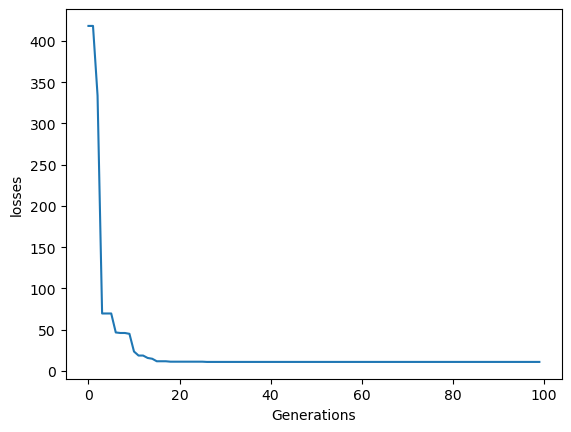

In [85]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):

      # *********** your code here *************
      losses_list = np.array(losses_list)
      generations = np.arange(100)
      plt.plot(generations, losses_list)
      plt.xlabel('Generations')
      plt.ylabel('losses')
      plt.show()

losses_list = run_GA()
visualize_loss(losses_list)

[-3.367887186062468, 0.5736847105054466, -1.4346603514622236, -0.6185368157313942]


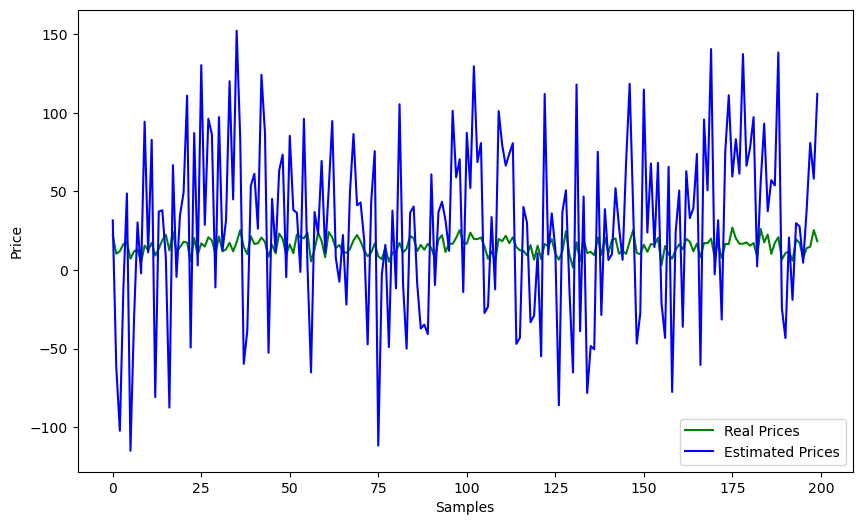

In [87]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
     # ************* your code here *************
     estimated_price = feature @ theta
     estimated_prices.append(estimated_price)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[-3.367887186062468, 0.5736847105054466, -1.4346603514622236, -0.6185368157313942]


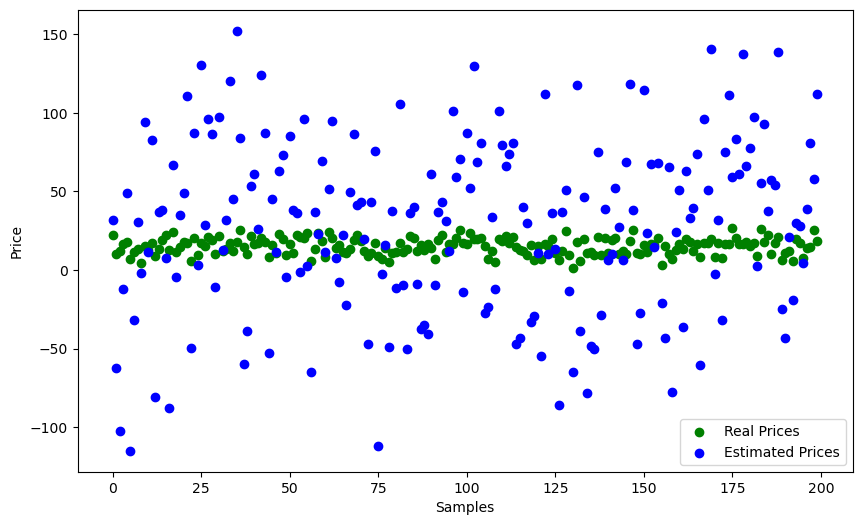

In [88]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()